<a href="https://colab.research.google.com/github/M-luthra07/RNN/blob/main/practical_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Alcohol_Sales-1.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()


,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

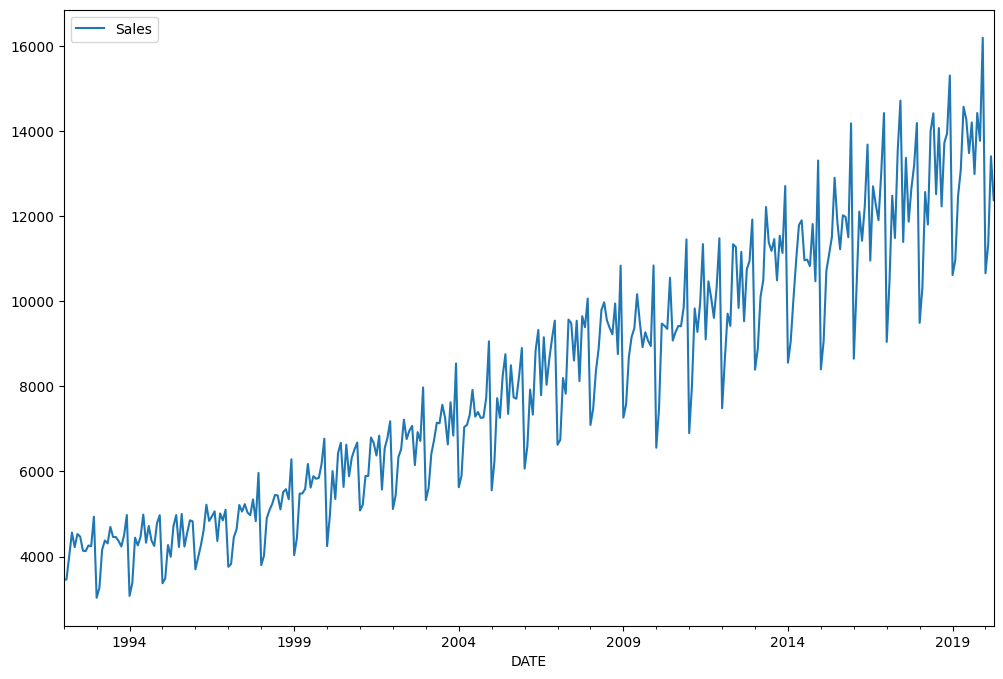

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE'>

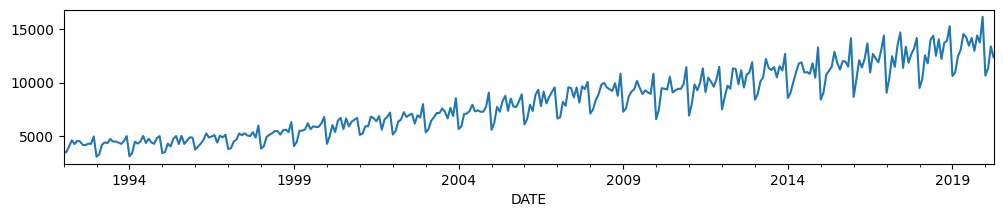

In [ ]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

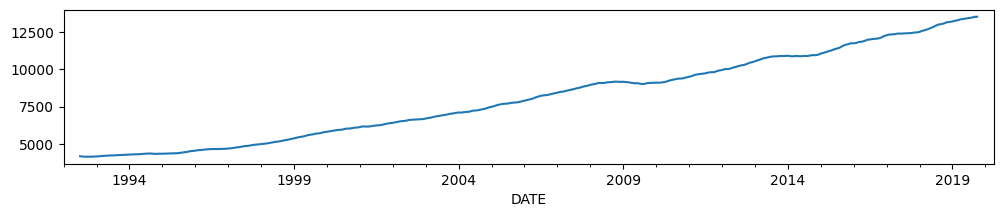

In [ ]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

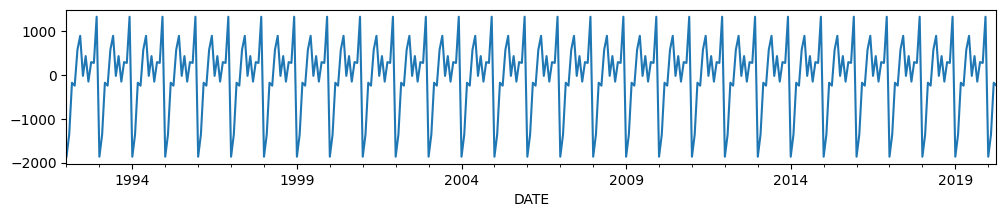

In [ ]:
results.seasonal.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

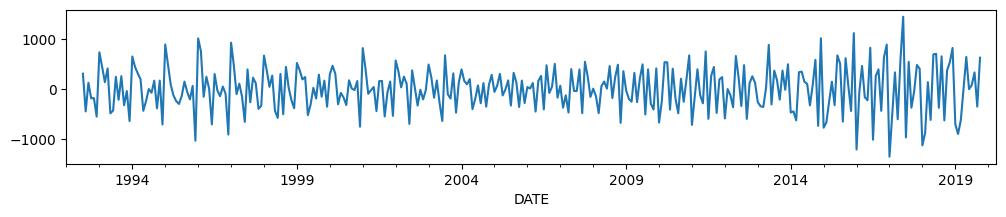

In [ ]:
results.resid.plot(figsize=(12,2))

In [ ]:
len(df)

340

In [ ]:
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
len(test)

27

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [ ]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
len(scaled_train)
len(generator) # n_input = 2
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945]
Predict this y: 
 [[0.08309088]]
Given the Array: 
[0.03662502 0.03653945 0.08309088 0.13118261 0.10183125 0.12818757
 0.12279651 0.09464316 0.09370187 0.10508301 0.10345713 0.16301557]
Predict this y: 
 [[0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%%time
# fit model
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0519
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0099
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0102
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0067
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0085
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0085
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0062
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0057
Epoch 9/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0047
Epoch 10/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0041
Epoch 11/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0032
Epoch 12/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0027
Epoch 13/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0023
Epoch 14/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0020
Epoch 15/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

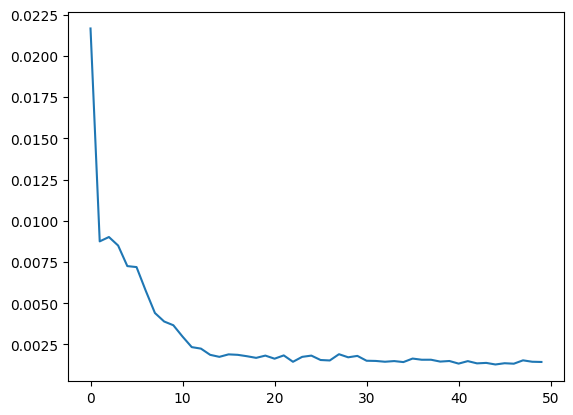

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
first_eval_batch = scaled_train[-12:]
first_eval_batch
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)
scaled_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


array([0.62450796])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
current_batch.shape
current_batch
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80865993],
        [ 0.72377203],
        [ 0.89902447],
        [ 1.        ],
        [ 0.71572822],
        [ 0.88499059],
        [ 0.75646072],
        [ 0.82423413],
        [ 0.87035769],
        [ 0.95498888],
        [ 0.55296937],
        [99.        ]]])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [ ]:
test_predictions

[array([0.78663546], dtype=float32),
 array([0.8830408], dtype=float32),
 array([0.85258895], dtype=float32),
 array([1.0172502], dtype=float32),
 array([1.0747817], dtype=float32),
 array([0.83538115], dtype=float32),
 array([0.98101276], dtype=float32),
 array([0.8508363], dtype=float32),
 array([0.9383381], dtype=float32),
 array([0.9743585], dtype=float32),
 array([1.0373534], dtype=float32),
 array([0.70155764], dtype=float32),
 array([0.91901773], dtype=float32),
 array([0.9663587], dtype=float32),
 array([0.98407286], dtype=float32),
 array([1.1293], dtype=float32),
 array([1.1537665], dtype=float32),
 array([0.9479271], dtype=float32),
 array([1.0810355], dtype=float32),
 array([0.9495073], dtype=float32),
 array([1.0590804], dtype=float32),
 array([1.0750592], dtype=float32),
 array([1.1254574], dtype=float32),
 array([0.8408936], dtype=float32),
 array([1.0509512], dtype=float32),
 array([1.055494], dtype=float32),
 array([1.1172737], dtype=float32)]

In [ ]:
scaled_test

array([[0.62450796],
       [0.81619031],
       [0.75081294],
       [0.9396714 ],
       [0.97458497],
       [0.81182612],
       [0.94489132],
       [0.78726681],
       [0.91528324],
       [0.93428034],
       [1.05057334],
       [0.64906726],
       [0.67987335],
       [0.80788978],
       [0.86145816],
       [0.98767756],
       [0.96234811],
       [0.89448913],
       [0.95618689],
       [0.85238747],
       [0.97518398],
       [0.91921958],
       [1.12664727],
       [0.65274688],
       [0.71187746],
       [0.88815677],
       [0.79984597]])

Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[12223.62196767],
       [13350.21462274],
       [12994.35448825],
       [14918.58560634],
       [15590.89843512],
       [12793.26412177],
       [14495.11513197],
       [12973.87273312],
       [13996.41904724],
       [14417.3534199 ],
       [15153.51179051],
       [11229.40253735],
       [13770.64121783],
       [14323.8680166 ],
       [14530.87548935],
       [16227.99977994],
       [16513.91546941],
       [14108.47629333],
       [15663.98079228],
       [14126.94226205],
       [15407.41311407],
       [15594.14152479],
       [16183.09524703],
       [12857.68291593],
       [15312.41621923],
       [15365.50230956],
       [16087.46032166]])

In [ ]:
test

,Sales
DATE,
2018-02-01,10329
2018-03-01,12569
2018-04-01,11805
2018-05-01,14012
2018-06-01,14420
2018-07-01,12518
2018-08-01,14073
2018-09-01,12231
2018-10-01,13727


In [ ]:
test['Predictions'] = true_predictions

<ipython-input-33-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,Sales,Predictions
DATE,,
2018-02-01,10329,12223.621968
2018-03-01,12569,13350.214623
2018-04-01,11805,12994.354488
2018-05-01,14012,14918.585606
2018-06-01,14420,15590.898435
2018-07-01,12518,12793.264122
2018-08-01,14073,14495.115132
2018-09-01,12231,12973.872733
2018-10-01,13727,13996.419047


<Axes: xlabel='DATE'>

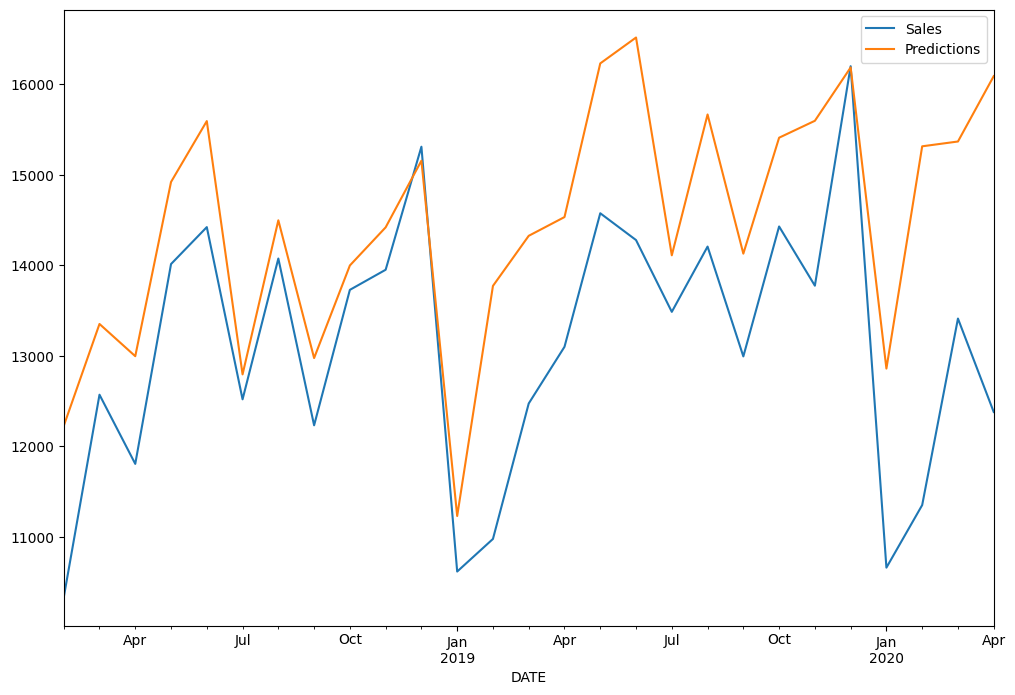

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
train_size = int(len(scaled_train) * 0.8)
X_train, y_train = scaled_train[:train_size, :-1], scaled_train[:train_size, -1]  # Assuming last column is target
X_test, y_test = scaled_train[train_size:, :-1], scaled_train[train_size:, -1]
train_size = int(len(scaled_train) * 0.8)
# Reshape scaled_train to have a second dimension for features
scaled_train_reshaped = scaled_train.reshape(scaled_train.shape[0], 1)

# Now create X_train and X_test using the reshaped array
X_train, y_train = scaled_train_reshaped[:train_size], scaled_train[:train_size]
X_test, y_test = scaled_train_reshaped[train_size:], scaled_train[train_size:]

# The rest of the code remains the same
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0479 - val_loss: 0.2131
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0339 - val_loss: 0.1501
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0231 - val_loss: 0.0979
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0158 - val_loss: 0.0664
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - val_loss: 0.0493
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - val_loss: 0.0418
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - val_loss: 0.0388
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - val_loss: 0.0342
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090 - val_loss: 0.0265
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0069 - val_loss: 0.0195
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - val_loss: 0.0141
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - val_loss: 0.0102
E

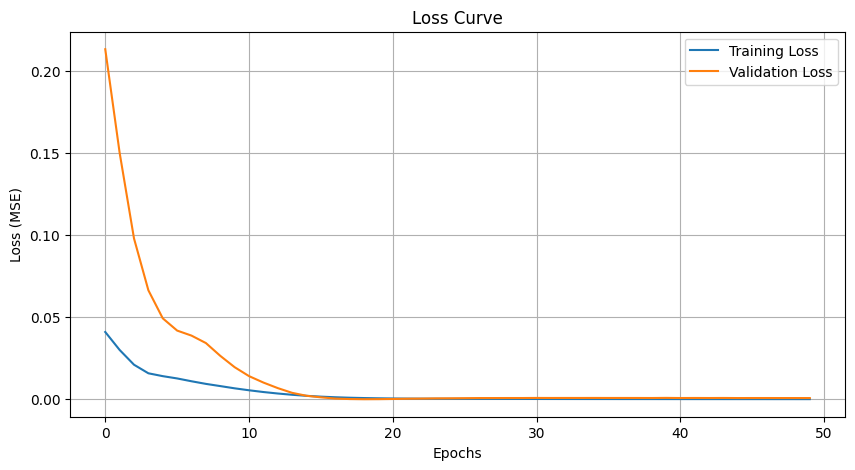

In [ ]:
# Plotting Loss Curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error (MSE): 0.0007618969345938564
Mean Absolute Error (MAE): 0.0227901209611055
R^2 Score: 0.9539137290327823


In [ ]:
# Ensure test data is in the right shape for RNN (3D)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict on test data
y_pred = model.predict(X_test)

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
Mean Squared Error (MSE): 0.0007618969345938564
Mean Absolute Error (MAE): 0.0227901209611055
R^2 Score: 0.9539137290327823


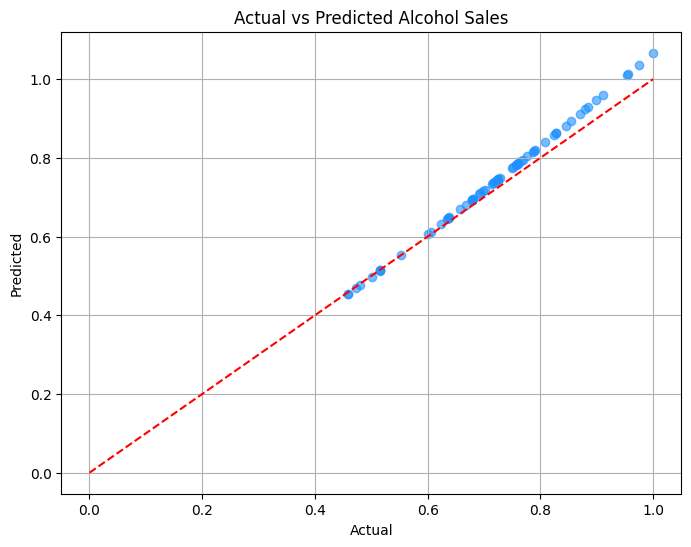

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Alcohol Sales')
plt.grid(True)
plt.show()
